In [1]:
#import pandas as pd
#import numpy as np
#import matplotlib.pyplot as plt
#import seaborn as sns
#ads = pd.read_csv(r'C:\Users\DIPANSHU\Downloads\sNAds.csv') 
#ads = sns.load_dataset("mpg")
#ads.head()


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,classification_report,accuracy_score, precision_score, recall_score, f1_score

In [2]:
data = sns.load_dataset("iris")
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [4]:
data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
data.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [6]:
data.shape

(150, 5)

In [7]:
data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [8]:
x = data.iloc[:,2:4]

In [9]:
y = data.iloc[:,4]

In [10]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

In [11]:
scale = StandardScaler()
x_train = scale.fit_transform(x_train)
x_test = scale.transform(x_test)

In [12]:
lr = LogisticRegression(random_state = 0,solver = 'lbfgs')
lr.fit(x_train,y_train)
pred = lr.predict(x_test)
       
print(x_test[:10])
print('-'*15)
print(pred[:10])

[[ 0.51683569 -0.01918559]
 [-1.21973223 -1.22787777]
 [ 1.79031883  1.45810485]
 [ 0.4010645   0.3837118 ]
 [ 0.57472129  0.24941267]
 [-1.33550342 -1.09357864]
 [-0.11990588  0.11511354]
 [ 0.74837808  1.45810485]
 [ 0.4010645   0.3837118 ]
 [ 0.05375091 -0.01918559]]
---------------
['versicolor' 'setosa' 'virginica' 'versicolor' 'versicolor' 'setosa'
 'versicolor' 'virginica' 'versicolor' 'versicolor']


In [13]:
print(pred[:20])
print('-'*15)
print(y_test[:20])

['versicolor' 'setosa' 'virginica' 'versicolor' 'versicolor' 'setosa'
 'versicolor' 'virginica' 'versicolor' 'versicolor' 'virginica' 'setosa'
 'setosa' 'setosa' 'setosa' 'versicolor' 'virginica' 'versicolor'
 'versicolor' 'virginica']
---------------
73     versicolor
18         setosa
118     virginica
78     versicolor
76     versicolor
31         setosa
64     versicolor
141     virginica
68     versicolor
82     versicolor
110     virginica
12         setosa
36         setosa
9          setosa
19         setosa
56     versicolor
104     virginica
69     versicolor
55     versicolor
132     virginica
Name: species, dtype: object


In [14]:
matrix = confusion_matrix(y_test,pred,labels = lr.classes_)
print(matrix)

tp, fp, tn, fn = confusion_matrix ( y_test, pred, labels = [1,0] ).reshape(-1)

[[15  0  0]
 [ 0 11  0]
 [ 0  0 12]]


TypeError: '<' not supported between instances of 'int' and 'str'

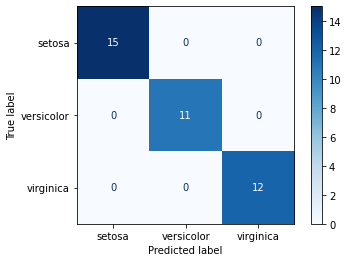

In [15]:
conf_matrix = ConfusionMatrixDisplay(confusion_matrix=matrix,display_labels=lr.classes_)
conf_matrix.plot(cmap=plt.cm.Blues)
plt.show()

In [16]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       1.00      1.00      1.00        11
   virginica       1.00      1.00      1.00        12

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38



In [17]:
print('\nAccuracy: {:.2f}'.format(accuracy_score(y_test,pred)))
print('Error Rte: ',(fp+fn)/(tp+tn+fn+fp))
print('Sensitivity (Recall or True positive rate) :',tp/(tp+fn))
print('Specificity (True negative rate) :',tn/(fp+tn))
print('Precision (Positive predictive value) :',tp/(tp+fp))
print('False Positive Rate :',fp/(tn+fp))


Accuracy: 1.00


NameError: name 'fp' is not defined